In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# read data function

In [2]:
def read_abcd(path, cols, na_values):
    
    df = pd.read_csv(path, sep='\t', index_col='subjectkey', na_values=na_values)
    df = df.drop(df.index[0])
    
    for col in cols:
        df[col] = pd.to_numeric(df[col])
        df = df[cols]

    df = df.reset_index()
    df = df.sort_values(['subjectkey', 'interview_age'])
    df = df.drop_duplicates(subset=['subjectkey'], keep='first')
    df = df.drop(columns=['interview_age'])
    df = df.set_index('subjectkey')
    
    df_show = abcd_ysu02.join(df)
    df_show = df_show.drop(columns=[
        'isip_1d_2',
        'isip_5_2',
        'isip_1b_yn'
    ])
     
    for col in df_show.columns:
        print('{:<30}    n = {:<10}    mean = {:<10.4f}'.\
              format(col,  df_show[col].notnull().sum(), df_show[col].mean()))    
    print('\nsubjects:{:>10}\nfeatures:{:>10}'.format(df_show.shape[0], df_show.shape[1]))
    
    return df

# y target variable 

In [3]:
file_abcd_ysu02 = r'E:\gregn\data\ABCD\abcd3\abcd_ysu02.txt'
abcd_ysu02 = pd.read_csv(file_abcd_ysu02, sep='\t', index_col='subjectkey')
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02.index[0])
cols = [
    'interview_age',
    'isip_1d_2',
    'isip_5_2',
    'isip_1b_yn'
]

for col in cols:
    abcd_ysu02[col] = pd.to_numeric(abcd_ysu02[col])
    abcd_ysu02 = abcd_ysu02[cols]
    
abcd_ysu02 = abcd_ysu02.reset_index()
abcd_ysu02 = abcd_ysu02.sort_values(['subjectkey', 'interview_age'])
abcd_ysu02 = abcd_ysu02.drop_duplicates(subset=['subjectkey'], keep='first')
abcd_ysu02 = abcd_ysu02.drop(columns=['interview_age'])
abcd_ysu02 = abcd_ysu02.set_index('subjectkey')
    
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02[abcd_ysu02.isip_5_2 == 3].index) # drop accidental 
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02[abcd_ysu02.isip_5_2 == 2].index) # drop sneaky 
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02[abcd_ysu02.isip_1b_yn == 0].index) # drop religious 
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02[abcd_ysu02.isip_1d_2 > 10].index)

abcd_ysu02['isip_1d_2'] = abcd_ysu02['isip_1d_2'].fillna(0)

y = abcd_ysu02['isip_1d_2'].values
y = np.where(y>0, 1, y)

unique, counts = np.unique(y, return_counts=True)

print('number of subjects: {:>10}\n\n[0] never sipped: {:>12}\n[1] sipped by age 10:{:>9}'.\
      format(len(y), counts[0], counts[1]))

number of subjects:      10707

[0] never sipped:         9209
[1] sipped by age 10:     1498


# mrirscor02

In [4]:
path = r'E:\gregn\data\ABCD\abcd3\mrirscor02.txt'

cols = [
'interview_age',
'rsfmri_cor_ngd_au_scs_crcxlh',
'rsfmri_cor_ngd_au_scs_thplh',
'rsfmri_cor_ngd_au_scs_cdelh',
'rsfmri_cor_ngd_au_scs_ptlh',
'rsfmri_cor_ngd_au_scs_pllh',
'rsfmri_cor_ngd_au_scs_bs',
'rsfmri_cor_ngd_au_scs_hplh',
'rsfmri_cor_ngd_au_scs_aglh',
'rsfmri_cor_ngd_au_scs_aalh',
'rsfmri_cor_ngd_au_scs_vtdclh',
'rsfmri_cor_ngd_au_scs_crcxrh',
'rsfmri_cor_ngd_au_scs_thprh',
'rsfmri_cor_ngd_au_scs_cderh',
'rsfmri_cor_ngd_au_scs_ptrh',
'rsfmri_cor_ngd_au_scs_plrh',
'rsfmri_cor_ngd_au_scs_hprh',
'rsfmri_cor_ngd_au_scs_agrh',
'rsfmri_cor_ngd_au_scs_aarh',
'rsfmri_cor_ngd_au_scs_vtdcrh',
'rsfmri_cor_ngd_cerc_scs_crcxlh',
'rsfmri_cor_ngd_cerc_scs_thplh',
'rsfmri_cor_ngd_cerc_scs_cdelh',
'rsfmri_cor_ngd_cerc_scs_ptlh',
'rsfmri_cor_ngd_cerc_scs_pllh',
'rsfmri_cor_ngd_cerc_scs_bs',
'rsfmri_cor_ngd_cerc_scs_hplh',
'rsfmri_cor_ngd_cerc_scs_aglh',
'rsfmri_cor_ngd_cerc_scs_aalh',
'rsfmri_cor_ngd_cerc_scs_vtdclh',
'rsfmri_cor_ngd_cerc_scs_crcxrh',
'rsfmri_cor_ngd_cerc_scs_thprh',
'rsfmri_cor_ngd_cerc_scs_cderh',
'rsfmri_cor_ngd_cerc_scs_ptrh',
'rsfmri_cor_ngd_cerc_scs_plrh',
'rsfmri_cor_ngd_cerc_scs_hprh',
'rsfmri_cor_ngd_cerc_scs_agrh',
'rsfmri_cor_ngd_cerc_scs_aarh',
'rsfmri_cor_ngd_cerc_scs_vtdcrh',
'rsfmri_cor_ngd_copa_scs_crcxlh',
'rsfmri_cor_ngd_copa_scs_thplh',
'rsfmri_cor_ngd_copa_scs_cdelh',
'rsfmri_cor_ngd_copa_scs_ptlh',
'rsfmri_cor_ngd_copa_scs_pllh',
'rsfmri_cor_ngd_copa_scs_bs',
'rsfmri_cor_ngd_copa_scs_hplh',
'rsfmri_cor_ngd_copa_scs_aglh',
'rsfmri_cor_ngd_copa_scs_aalh',
'rsfmri_cor_ngd_copa_scs_vtdclh',
'rsfmri_cor_ngd_copa_scs_crcxrh',
'rsfmri_cor_ngd_copa_scs_thprh',
'rsfmri_cor_ngd_copa_scs_cderh',
'rsfmri_cor_ngd_copa_scs_ptrh',
'rsfmri_cor_ngd_copa_scs_plrh',
'rsfmri_cor_ngd_copa_scs_hprh',
'rsfmri_cor_ngd_copa_scs_agrh',
'rsfmri_cor_ngd_copa_scs_aarh',
'rsfmri_cor_ngd_copa_scs_vtdcrh',
'rsfmri_cor_ngd_df_scs_crcxlh',
'rsfmri_cor_ngd_df_scs_thplh',
'rsfmri_cor_ngd_df_scs_cdelh',
'rsfmri_cor_ngd_df_scs_ptlh',
'rsfmri_cor_ngd_df_scs_pllh',
'rsfmri_cor_ngd_df_scs_bs',
'rsfmri_cor_ngd_df_scs_hplh',
'rsfmri_cor_ngd_df_scs_aglh',
'rsfmri_cor_ngd_df_scs_aalh',
'rsfmri_cor_ngd_df_scs_vtdclh',
'rsfmri_cor_ngd_df_scs_crcxrh',
'rsfmri_cor_ngd_df_scs_thprh',
'rsfmri_cor_ngd_df_scs_cderh',
'rsfmri_cor_ngd_df_scs_ptrh',
'rsfmri_cor_ngd_df_scs_plrh',
'rsfmri_cor_ngd_df_scs_hprh',
'rsfmri_cor_ngd_df_scs_agrh',
'rsfmri_cor_ngd_df_scs_aarh',
'rsfmri_cor_ngd_df_scs_vtdcrh',
'rsfmri_cor_ngd_dsa_scs_crcxlh',
'rsfmri_cor_ngd_dsa_scs_thplh',
'rsfmri_cor_ngd_dsa_scs_cdelh',
'rsfmri_cor_ngd_dsa_scs_ptlh',
'rsfmri_cor_ngd_dsa_scs_pllh',
'rsfmri_cor_ngd_dsa_scs_bs',
'rsfmri_cor_ngd_dsa_scs_hplh',
'rsfmri_cor_ngd_dsa_scs_aglh',
'rsfmri_cor_ngd_dsa_scs_aalh',
'rsfmri_cor_ngd_dsa_scs_vtdclh',
'rsfmri_cor_ngd_dsa_scs_crcxrh',
'rsfmri_cor_ngd_dsa_scs_thprh',
'rsfmri_cor_ngd_dsa_scs_cderh',
'rsfmri_cor_ngd_dsa_scs_ptrh',
'rsfmri_cor_ngd_dsa_scs_plrh',
'rsfmri_cor_ngd_dsa_scs_hprh',
'rsfmri_cor_ngd_dsa_scs_agrh',
'rsfmri_cor_ngd_dsa_scs_aarh',
'rsfmri_cor_ngd_dsa_scs_vtdcrh',
'rsfmri_cor_ngd_fopa_scs_crcxlh',
'rsfmri_cor_ngd_fopa_scs_thplh',
'rsfmri_cor_ngd_fopa_scs_cdelh',
'rsfmri_cor_ngd_fopa_scs_ptlh',
'rsfmri_cor_ngd_fopa_scs_pllh',
'rsfmri_cor_ngd_fopa_scs_bs',
'rsfmri_cor_ngd_fopa_scs_hplh',
'rsfmri_cor_ngd_fopa_scs_aglh',
'rsfmri_cor_ngd_fopa_scs_aalh',
'rsfmri_cor_ngd_fopa_scs_vtdclh',
'rsfmri_cor_ngd_fopa_scs_crcxrh',
'rsfmri_cor_ngd_fopa_scs_thprh',
'rsfmri_cor_ngd_fopa_scs_cderh',
'rsfmri_cor_ngd_fopa_scs_ptrh',
'rsfmri_cor_ngd_fopa_scs_plrh',
'rsfmri_cor_ngd_fopa_scs_hprh',
'rsfmri_cor_ngd_fopa_scs_agrh',
'rsfmri_cor_ngd_fopa_scs_aarh',
'rsfmri_cor_ngd_fopa_scs_vtdcrh',
'rsfmri_cor_ngd_none_scs_crcxlh',
'rsfmri_cor_ngd_none_scs_thplh',
'rsfmri_cor_ngd_none_scs_cdelh',
'rsfmri_cor_ngd_none_scs_ptlh',
'rsfmri_cor_ngd_none_scs_pllh',
'rsfmri_cor_ngd_none_scs_bs',
'rsfmri_cor_ngd_none_scs_hplh',
'rsfmri_cor_ngd_none_scs_aglh',
'rsfmri_cor_ngd_none_scs_aalh',
'rsfmri_cor_ngd_none_scs_vtdclh',
'rsfmri_cor_ngd_none_scs_crcxrh',
'rsfmri_cor_ngd_none_scs_thprh',
'rsfmri_cor_ngd_none_scs_cderh',
'rsfmri_cor_ngd_none_scs_ptrh',
'rsfmri_cor_ngd_none_scs_plrh',
'rsfmri_cor_ngd_none_scs_hprh',
'rsfmri_cor_ngd_none_scs_agrh',
'rsfmri_cor_ngd_none_scs_aarh',
'rsfmri_cor_ngd_none_scs_vtdcrh',
'rsfmri_cor_ngd_rst_scs_crcxlh',
'rsfmri_cor_ngd_rst_scs_thplh',
'rsfmri_cor_ngd_rst_scs_cdelh',
'rsfmri_cor_ngd_rst_scs_ptlh',
'rsfmri_cor_ngd_rst_scs_pllh',
'rsfmri_cor_ngd_rst_scs_bs',
'rsfmri_cor_ngd_rst_scs_hplh',
'rsfmri_cor_ngd_rst_scs_aglh',
'rsfmri_cor_ngd_rst_scs_aalh',
'rsfmri_cor_ngd_rst_scs_vtdclh',
'rsfmri_cor_ngd_rst_scs_crcxrh',
'rsfmri_cor_ngd_rst_scs_thprh',
'rsfmri_cor_ngd_rst_scs_cderh',
'rsfmri_cor_ngd_rst_scs_ptrh',
'rsfmri_cor_ngd_rst_scs_plrh',
'rsfmri_cor_ngd_rst_scs_hprh',
'rsfmri_cor_ngd_rst_scs_agrh',
'rsfmri_cor_ngd_rst_scs_aarh',
'rsfmri_cor_ngd_rst_scs_vtdcrh',
'rsfmri_cor_ngd_smh_scs_crcxlh',
'rsfmri_cor_ngd_smh_scs_thplh',
'rsfmri_cor_ngd_smh_scs_cdelh',
'rsfmri_cor_ngd_smh_scs_ptlh',
'rsfmri_cor_ngd_smh_scs_pllh',
'rsfmri_cor_ngd_smh_scs_bs',
'rsfmri_cor_ngd_smh_scs_hplh',
'rsfmri_cor_ngd_smh_scs_aglh',
'rsfmri_cor_ngd_smh_scs_aalh',
'rsfmri_cor_ngd_smh_scs_vtdclh',
'rsfmri_cor_ngd_smh_scs_crcxrh',
'rsfmri_cor_ngd_smh_scs_thprh',
'rsfmri_cor_ngd_smh_scs_cderh',
'rsfmri_cor_ngd_smh_scs_ptrh',
'rsfmri_cor_ngd_smh_scs_plrh',
'rsfmri_cor_ngd_smh_scs_hprh',
'rsfmri_cor_ngd_smh_scs_agrh',
'rsfmri_cor_ngd_smh_scs_aarh',
'rsfmri_cor_ngd_smh_scs_vtdcrh',
'rsfmri_cor_ngd_smm_scs_crcxlh',
'rsfmri_cor_ngd_smm_scs_thplh',
'rsfmri_cor_ngd_smm_scs_cdelh',
'rsfmri_cor_ngd_smm_scs_ptlh',
'rsfmri_cor_ngd_smm_scs_pllh',
'rsfmri_cor_ngd_smm_scs_bs',
'rsfmri_cor_ngd_smm_scs_hplh',
'rsfmri_cor_ngd_smm_scs_aglh',
'rsfmri_cor_ngd_smm_scs_aalh',
'rsfmri_cor_ngd_smm_scs_vtdclh',
'rsfmri_cor_ngd_smm_scs_crcxrh',
'rsfmri_cor_ngd_smm_scs_thprh',
'rsfmri_cor_ngd_smm_scs_cderh',
'rsfmri_cor_ngd_smm_scs_ptrh',
'rsfmri_cor_ngd_smm_scs_plrh',
'rsfmri_cor_ngd_smm_scs_hprh',
'rsfmri_cor_ngd_smm_scs_agrh',
'rsfmri_cor_ngd_smm_scs_aarh',
'rsfmri_cor_ngd_smm_scs_vtdcrh',
'rsfmri_cor_ngd_sa_scs_crcxlh',
'rsfmri_cor_ngd_sa_scs_thplh',
'rsfmri_cor_ngd_sa_scs_cdelh',
'rsfmri_cor_ngd_sa_scs_ptlh',
'rsfmri_cor_ngd_sa_scs_pllh',
'rsfmri_cor_ngd_sa_scs_bs',
'rsfmri_cor_ngd_sa_scs_hplh',
'rsfmri_cor_ngd_sa_scs_aglh',
'rsfmri_cor_ngd_sa_scs_aalh',
'rsfmri_cor_ngd_sa_scs_vtdclh',
'rsfmri_cor_ngd_sa_scs_crcxrh',
'rsfmri_cor_ngd_sa_scs_thprh',
'rsfmri_cor_ngd_sa_scs_cderh',
'rsfmri_cor_ngd_sa_scs_ptrh',
'rsfmri_cor_ngd_sa_scs_plrh',
'rsfmri_cor_ngd_sa_scs_hprh',
'rsfmri_cor_ngd_sa_scs_agrh',
'rsfmri_cor_ngd_sa_scs_aarh',
'rsfmri_cor_ngd_sa_scs_vtdcrh',
'rsfmri_cor_ngd_vta_scs_crcxlh',
'rsfmri_cor_ngd_vta_scs_thplh',
'rsfmri_cor_ngd_vta_scs_cdelh',
'rsfmri_cor_ngd_vta_scs_ptlh',
'rsfmri_cor_ngd_vta_scs_pllh',
'rsfmri_cor_ngd_vta_scs_bs',
'rsfmri_cor_ngd_vta_scs_hplh',
'rsfmri_cor_ngd_vta_scs_aglh',
'rsfmri_cor_ngd_vta_scs_aalh',
'rsfmri_cor_ngd_vta_scs_vtdclh',
'rsfmri_cor_ngd_vta_scs_crcxrh',
'rsfmri_cor_ngd_vta_scs_thprh',
'rsfmri_cor_ngd_vta_scs_cderh',
'rsfmri_cor_ngd_vta_scs_ptrh',
'rsfmri_cor_ngd_vta_scs_plrh',
'rsfmri_cor_ngd_vta_scs_hprh',
'rsfmri_cor_ngd_vta_scs_agrh',
'rsfmri_cor_ngd_vta_scs_aarh',
'rsfmri_cor_ngd_vta_scs_vtdcrh',
'rsfmri_cor_ngd_vs_scs_crcxlh',
'rsfmri_cor_ngd_vs_scs_thplh',
'rsfmri_cor_ngd_vs_scs_cdelh',
'rsfmri_cor_ngd_vs_scs_ptlh',
'rsfmri_cor_ngd_vs_scs_pllh',
'rsfmri_cor_ngd_vs_scs_bs',
'rsfmri_cor_ngd_vs_scs_hplh',
'rsfmri_cor_ngd_vs_scs_aglh',
'rsfmri_cor_ngd_vs_scs_aalh',
'rsfmri_cor_ngd_vs_scs_vtdclh',
'rsfmri_cor_ngd_vs_scs_crcxrh',
'rsfmri_cor_ngd_vs_scs_thprh',
'rsfmri_cor_ngd_vs_scs_cderh',
'rsfmri_cor_ngd_vs_scs_ptrh',
'rsfmri_cor_ngd_vs_scs_plrh',
'rsfmri_cor_ngd_vs_scs_hprh',
'rsfmri_cor_ngd_vs_scs_agrh',
'rsfmri_cor_ngd_vs_scs_aarh',
'rsfmri_cor_ngd_vs_scs_vtdcrh',
]

na_values = [None]
mrirscor02 = read_abcd(path, cols, na_values)

rsfmri_cor_ngd_au_scs_crcxlh      n = 10323         mean = -0.0944   
rsfmri_cor_ngd_au_scs_thplh       n = 10318         mean = -0.0607   
rsfmri_cor_ngd_au_scs_cdelh       n = 10323         mean = -0.0330   
rsfmri_cor_ngd_au_scs_ptlh        n = 10320         mean = -0.0792   
rsfmri_cor_ngd_au_scs_pllh        n = 10320         mean = -0.0302   
rsfmri_cor_ngd_au_scs_bs          n = 10322         mean = -0.0201   
rsfmri_cor_ngd_au_scs_hplh        n = 10305         mean = -0.0397   
rsfmri_cor_ngd_au_scs_aglh        n = 10323         mean = -0.0727   
rsfmri_cor_ngd_au_scs_aalh        n = 10307         mean = -0.0670   
rsfmri_cor_ngd_au_scs_vtdclh      n = 10323         mean = -0.0527   
rsfmri_cor_ngd_au_scs_crcxrh      n = 10322         mean = -0.0606   
rsfmri_cor_ngd_au_scs_thprh       n = 10318         mean = -0.1077   
rsfmri_cor_ngd_au_scs_cderh       n = 10322         mean = -0.0416   
rsfmri_cor_ngd_au_scs_ptrh        n = 10323         mean = 0.1320    
rsfmri_cor_ngd_au_sc

# abcd_betnet02

In [5]:
path = r'E:\gregn\data\ABCD\abcd3\abcd_betnet02.txt'

cols = [
'interview_age',
'rsfmri_c_ngd_ad_ngd_ad',
'rsfmri_c_ngd_ad_ngd_cgc',
'rsfmri_c_ngd_ad_ngd_ca',
'rsfmri_c_ngd_ad_ngd_dt',
'rsfmri_c_ngd_ad_ngd_dla',
'rsfmri_c_ngd_ad_ngd_fo',
'rsfmri_c_ngd_ad_ngd_n',
'rsfmri_c_ngd_ad_ngd_rspltp',
'rsfmri_c_ngd_ad_ngd_smh',
'rsfmri_c_ngd_ad_ngd_smm',
'rsfmri_c_ngd_ad_ngd_sa',
'rsfmri_c_ngd_ad_ngd_vta',
'rsfmri_c_ngd_ad_ngd_vs',
'rsfmri_c_ngd_cgc_ngd_ad',
'rsfmri_c_ngd_cgc_ngd_cgc',
'rsfmri_c_ngd_cgc_ngd_ca',
'rsfmri_c_ngd_cgc_ngd_dt',
'rsfmri_c_ngd_cgc_ngd_dla',
'rsfmri_c_ngd_cgc_ngd_fo',
'rsfmri_c_ngd_cgc_ngd_n',
'rsfmri_c_ngd_cgc_ngd_rspltp',
'rsfmri_c_ngd_cgc_ngd_smh',
'rsfmri_c_ngd_cgc_ngd_smm',
'rsfmri_c_ngd_cgc_ngd_sa',
'rsfmri_c_ngd_cgc_ngd_vta',
'rsfmri_c_ngd_cgc_ngd_vs',
'rsfmri_c_ngd_ca_ngd_ad',
'rsfmri_c_ngd_ca_ngd_cgc',
'rsfmri_c_ngd_ca_ngd_ca',
'rsfmri_c_ngd_ca_ngd_dt',
'rsfmri_c_ngd_ca_ngd_dla',
'rsfmri_c_ngd_ca_ngd_fo',
'rsfmri_c_ngd_ca_ngd_n',
'rsfmri_c_ngd_ca_ngd_rspltp',
'rsfmri_c_ngd_ca_ngd_smh',
'rsfmri_c_ngd_ca_ngd_smm',
'rsfmri_c_ngd_ca_ngd_sa',
'rsfmri_c_ngd_ca_ngd_vta',
'rsfmri_c_ngd_ca_ngd_vs',
'rsfmri_c_ngd_dt_ngd_ad',
'rsfmri_c_ngd_dt_ngd_cgc',
'rsfmri_c_ngd_dt_ngd_ca',
'rsfmri_c_ngd_dt_ngd_dt',
'rsfmri_c_ngd_dt_ngd_dla',
'rsfmri_c_ngd_dt_ngd_fo',
'rsfmri_c_ngd_dt_ngd_n',
'rsfmri_c_ngd_dt_ngd_rspltp',
'rsfmri_c_ngd_dt_ngd_smh',
'rsfmri_c_ngd_dt_ngd_smm',
'rsfmri_c_ngd_dt_ngd_sa',
'rsfmri_c_ngd_dt_ngd_vta',
'rsfmri_c_ngd_dt_ngd_vs',
'rsfmri_c_ngd_dla_ngd_ad',
'rsfmri_c_ngd_dla_ngd_cgc',
'rsfmri_c_ngd_dla_ngd_ca',
'rsfmri_c_ngd_dla_ngd_dt',
'rsfmri_c_ngd_dla_ngd_dla',
'rsfmri_c_ngd_dla_ngd_fo',
'rsfmri_c_ngd_dla_ngd_n',
'rsfmri_c_ngd_dla_ngd_rspltp',
'rsfmri_c_ngd_dla_ngd_smh',
'rsfmri_c_ngd_dla_ngd_smm',
'rsfmri_c_ngd_dla_ngd_sa',
'rsfmri_c_ngd_dla_ngd_vta',
'rsfmri_c_ngd_dla_ngd_vs',
'rsfmri_c_ngd_fo_ngd_ad',
'rsfmri_c_ngd_fo_ngd_cgc',
'rsfmri_c_ngd_fo_ngd_ca',
'rsfmri_c_ngd_fo_ngd_dt',
'rsfmri_c_ngd_fo_ngd_dla',
'rsfmri_c_ngd_fo_ngd_fo',
'rsfmri_c_ngd_fo_ngd_n',
'rsfmri_c_ngd_fo_ngd_rspltp',
'rsfmri_c_ngd_fo_ngd_smh',
'rsfmri_c_ngd_fo_ngd_smm',
'rsfmri_c_ngd_fo_ngd_sa',
'rsfmri_c_ngd_fo_ngd_vta',
'rsfmri_c_ngd_fo_ngd_vs',
'rsfmri_c_ngd_n_ngd_ad',
'rsfmri_c_ngd_n_ngd_cgc',
'rsfmri_c_ngd_n_ngd_ca',
'rsfmri_c_ngd_n_ngd_dt',
'rsfmri_c_ngd_n_ngd_dla',
'rsfmri_c_ngd_n_ngd_fo',
'rsfmri_c_ngd_n_ngd_n',
'rsfmri_c_ngd_n_ngd_rspltp',
'rsfmri_c_ngd_n_ngd_smh',
'rsfmri_c_ngd_n_ngd_smm',
'rsfmri_c_ngd_n_ngd_sa',
'rsfmri_c_ngd_n_ngd_vta',
'rsfmri_c_ngd_n_ngd_vs',
'rsfmri_c_ngd_rspltp_ngd_ad',
'rsfmri_c_ngd_rspltp_ngd_cgc',
'rsfmri_c_ngd_rspltp_ngd_ca',
'rsfmri_c_ngd_rspltp_ngd_dt',
'rsfmri_c_ngd_rspltp_ngd_dla',
'rsfmri_c_ngd_rspltp_ngd_fo',
'rsfmri_c_ngd_rspltp_ngd_n',
'rsfmri_c_ngd_rspltp_ngd_rspltp',
'rsfmri_c_ngd_rspltp_ngd_smh',
'rsfmri_c_ngd_rspltp_ngd_smm',
'rsfmri_c_ngd_rspltp_ngd_sa',
'rsfmri_c_ngd_rspltp_ngd_vta',
'rsfmri_c_ngd_rspltp_ngd_vs',
'rsfmri_c_ngd_smh_ngd_ad',
'rsfmri_c_ngd_smh_ngd_cgc',
'rsfmri_c_ngd_smh_ngd_ca',
'rsfmri_c_ngd_smh_ngd_dt',
'rsfmri_c_ngd_smh_ngd_dla',
'rsfmri_c_ngd_smh_ngd_fo',
'rsfmri_c_ngd_smh_ngd_n',
'rsfmri_c_ngd_smh_ngd_rspltp',
'rsfmri_c_ngd_smh_ngd_smh',
'rsfmri_c_ngd_smh_ngd_smm',
'rsfmri_c_ngd_smh_ngd_sa',
'rsfmri_c_ngd_smh_ngd_vta',
'rsfmri_c_ngd_smh_ngd_vs',
'rsfmri_c_ngd_smm_ngd_ad',
'rsfmri_c_ngd_smm_ngd_cgc',
'rsfmri_c_ngd_smm_ngd_ca',
'rsfmri_c_ngd_smm_ngd_dt',
'rsfmri_c_ngd_smm_ngd_dla',
'rsfmri_c_ngd_smm_ngd_fo',
'rsfmri_c_ngd_smm_ngd_n',
'rsfmri_c_ngd_smm_ngd_rspltp',
'rsfmri_c_ngd_smm_ngd_smh',
'rsfmri_c_ngd_smm_ngd_smm',
'rsfmri_c_ngd_smm_ngd_sa',
'rsfmri_c_ngd_smm_ngd_vta',
'rsfmri_c_ngd_smm_ngd_vs',
'rsfmri_c_ngd_sa_ngd_ad',
'rsfmri_c_ngd_sa_ngd_cgc',
'rsfmri_c_ngd_sa_ngd_ca',
'rsfmri_c_ngd_sa_ngd_dt',
'rsfmri_c_ngd_sa_ngd_dla',
'rsfmri_c_ngd_sa_ngd_fo',
'rsfmri_c_ngd_sa_ngd_n',
'rsfmri_c_ngd_sa_ngd_rspltp',
'rsfmri_c_ngd_sa_ngd_smh',
'rsfmri_c_ngd_sa_ngd_smm',
'rsfmri_c_ngd_sa_ngd_sa',
'rsfmri_c_ngd_sa_ngd_vta',
'rsfmri_c_ngd_sa_ngd_vs',
'rsfmri_c_ngd_vta_ngd_ad',
'rsfmri_c_ngd_vta_ngd_cgc',
'rsfmri_c_ngd_vta_ngd_ca',
'rsfmri_c_ngd_vta_ngd_dt',
'rsfmri_c_ngd_vta_ngd_dla',
'rsfmri_c_ngd_vta_ngd_fo',
'rsfmri_c_ngd_vta_ngd_n',
'rsfmri_c_ngd_vta_ngd_rspltp',
'rsfmri_c_ngd_vta_ngd_smh',
'rsfmri_c_ngd_vta_ngd_smm',
'rsfmri_c_ngd_vta_ngd_sa',
'rsfmri_c_ngd_vta_ngd_vta',
'rsfmri_c_ngd_vta_ngd_vs',
'rsfmri_c_ngd_vs_ngd_ad',
'rsfmri_c_ngd_vs_ngd_cgc',
'rsfmri_c_ngd_vs_ngd_ca',
'rsfmri_c_ngd_vs_ngd_dt',
'rsfmri_c_ngd_vs_ngd_dla',
'rsfmri_c_ngd_vs_ngd_fo',
'rsfmri_c_ngd_vs_ngd_n',
'rsfmri_c_ngd_vs_ngd_rspltp',
'rsfmri_c_ngd_vs_ngd_smh',
'rsfmri_c_ngd_vs_ngd_smm',
'rsfmri_c_ngd_vs_ngd_sa',
'rsfmri_c_ngd_vs_ngd_vta',
'rsfmri_c_ngd_vs_ngd_vs',
]

na_values = [None]
abcd_betnet02 = read_abcd(path, cols, na_values)

rsfmri_c_ngd_ad_ngd_ad            n = 10323         mean = 0.3028    
rsfmri_c_ngd_ad_ngd_cgc           n = 10318         mean = 0.1684    
rsfmri_c_ngd_ad_ngd_ca            n = 10323         mean = -0.0553   
rsfmri_c_ngd_ad_ngd_dt            n = 10320         mean = -0.0435   
rsfmri_c_ngd_ad_ngd_dla           n = 10320         mean = -0.0238   
rsfmri_c_ngd_ad_ngd_fo            n = 10322         mean = -0.0400   
rsfmri_c_ngd_ad_ngd_n             n = 10305         mean = 0.0023    
rsfmri_c_ngd_ad_ngd_rspltp        n = 10323         mean = -0.0328   
rsfmri_c_ngd_ad_ngd_smh           n = 10307         mean = 0.1158    
rsfmri_c_ngd_ad_ngd_smm           n = 10323         mean = 0.2203    
rsfmri_c_ngd_ad_ngd_sa            n = 10322         mean = 0.0417    
rsfmri_c_ngd_ad_ngd_vta           n = 10318         mean = 0.0687    
rsfmri_c_ngd_ad_ngd_vs            n = 10322         mean = -0.0414   
rsfmri_c_ngd_cgc_ngd_ad           n = 10318         mean = 0.1684    
rsfmri_c_ngd_cgc_ngd

# acspsw03

In [6]:
path = r'E:\gregn\data\ABCD\abcd3\acspsw03.txt'

cols = [
    'interview_age',
    'rel_family_id',
]

na_values = [None]
acspsw03 = read_abcd(path, cols, na_values)

rel_family_id                     n = 10707         mean = 5921.1416 

subjects:     10707
features:         1


# join dataframes

In [7]:
dfs = [
    abcd_ysu02,
    acspsw03,
    mrirscor02,
    abcd_betnet02
]

abcd = dfs[0].join(dfs[1:])
print('number of subjects:', len(abcd))

number of subjects: 10707


# X features 

In [8]:
X = abcd.drop(columns=[
    'isip_1d_2',
    'isip_5_2',
    'isip_1b_yn',
    'rel_family_id'
])
print('number of features:', X.shape[1])
list(X.columns)

number of features: 416


['rsfmri_cor_ngd_au_scs_crcxlh',
 'rsfmri_cor_ngd_au_scs_thplh',
 'rsfmri_cor_ngd_au_scs_cdelh',
 'rsfmri_cor_ngd_au_scs_ptlh',
 'rsfmri_cor_ngd_au_scs_pllh',
 'rsfmri_cor_ngd_au_scs_bs',
 'rsfmri_cor_ngd_au_scs_hplh',
 'rsfmri_cor_ngd_au_scs_aglh',
 'rsfmri_cor_ngd_au_scs_aalh',
 'rsfmri_cor_ngd_au_scs_vtdclh',
 'rsfmri_cor_ngd_au_scs_crcxrh',
 'rsfmri_cor_ngd_au_scs_thprh',
 'rsfmri_cor_ngd_au_scs_cderh',
 'rsfmri_cor_ngd_au_scs_ptrh',
 'rsfmri_cor_ngd_au_scs_plrh',
 'rsfmri_cor_ngd_au_scs_hprh',
 'rsfmri_cor_ngd_au_scs_agrh',
 'rsfmri_cor_ngd_au_scs_aarh',
 'rsfmri_cor_ngd_au_scs_vtdcrh',
 'rsfmri_cor_ngd_cerc_scs_crcxlh',
 'rsfmri_cor_ngd_cerc_scs_thplh',
 'rsfmri_cor_ngd_cerc_scs_cdelh',
 'rsfmri_cor_ngd_cerc_scs_ptlh',
 'rsfmri_cor_ngd_cerc_scs_pllh',
 'rsfmri_cor_ngd_cerc_scs_bs',
 'rsfmri_cor_ngd_cerc_scs_hplh',
 'rsfmri_cor_ngd_cerc_scs_aglh',
 'rsfmri_cor_ngd_cerc_scs_aalh',
 'rsfmri_cor_ngd_cerc_scs_vtdclh',
 'rsfmri_cor_ngd_cerc_scs_crcxrh',
 'rsfmri_cor_ngd_cerc_scs_thprh'

# feature dictionary 

In [9]:
import ast

file = open(r'C:\Users\gregn\jupyter\ABCD\abcd_3_0\full set\abcd3_sip10_feature_dictionary.txt', 'r')

contents = file.read()
dictionary = ast.literal_eval(contents)
file.close()

X = X.rename(columns=dictionary)
dictionary

{'su_risk_p_1': 'Parent rules: ease of access to alcohol',
 'macv_p_ss_r': 'Parent MACV: religiosity',
 'site_id_l_site16': 'Site ID (Utah)',
 'stq_y_ss_weekend': 'Weekend screen time',
 'meim_ethnic_id_p_black/african_american': 'MEIM: Black/African American',
 'parent_rules_q1a_3.0': 'Parent rules: consistent family alcohol rules',
 'demo_prnt_ed_v2': 'Parent education level',
 'reshist_addr1_adi_edu_h': 'Neighborhood at birth: high school diploma (%)',
 'devhx_18_p': 'Months spent breastfeeding',
 'parent_rules_q1_1.0': 'Parent rules: not allowed to drink',
 'reshist_addr1_elevation': 'Neighborhood at birth: elevation',
 'demo_comb_income_v2': 'Total family income',
 'devhx_ss_8_alcohol_max_p': 'Mother: max number of drinks',
 'via_p_ss_hc': 'Parent VIA: heritage culture',
 'crpbi_parent3_y': 'CRPBI: sensitivity and responsiveness to child neg affect',
 'devhx_ss_8_alcohol_effects_p': 'Mother: number of drinks to feel effects',
 'asr_scr_somatic_t': 'Caregiver: ASR somatic problems'

# family groups 

In [10]:
from collections import defaultdict

d = defaultdict(lambda: len(d))
family_groups = [d[x] for x in abcd['rel_family_id']]
family_groups = np.array(family_groups)

# nested cross validation 

In [11]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, GroupKFold
from time import time
from datetime import timedelta
warnings.filterwarnings('ignore')

start_time = time()


model = XGBClassifier(
    tree_method = 'gpu_hist',
    objective = 'binary:logistic',
    eval_metric = 'auc',
    colsample_bytree = 0.4,
    random_state = 42
)


params = {
    'learning_rate': [0.005, 0.01, 0.1],
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 500, 1000, 1500, 2000, 2500],
    'colsample_bytree': [0.4, 0.8]
}


inner_cv = GroupKFold(n_splits=5)
inner_cv = inner_cv.get_n_splits(X, y, groups=family_groups.tolist())
    
outer_cv = GroupKFold(n_splits=5)
outer_cv = outer_cv.get_n_splits(X, y, groups=family_groups.tolist())
    
    
# non_nested parameter search and scoring
gs = GridSearchCV(
    estimator=model, 
    param_grid=params, 
    scoring='roc_auc', 
    cv=inner_cv,
    return_train_score=True,
    verbose=3
)


gs.fit(X,y)

nested_score = cross_val_score(
    gs,
    X=X, 
    y=y, 
    scoring='roc_auc', 
    cv=outer_cv,
)
print('-------------------------------------------------------------------------------')
print('\nruntime:', str(timedelta(seconds=time()-start_time)))
print('scores:', nested_score)
print('average score:', nested_score.mean())
print('std:', nested_score.std())
print('\nbest estimator:\n\n', gs.best_estimator_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.714, test=0.525) total time=   0.9s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.729, test=0.524) total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.728, test=0.534) total time=   0.7s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.715, test=0.519) total time=   0.7s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.757, test=0.533) total time=   0.7s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=500;, score=(train=0.866, test=0.533) total time=   3.2s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=500;, score=(train=0.

[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.998, test=0.572) total time=  35.3s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.951, test=0.526) total time=   2.6s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.957, test=0.537) total time=   2.6s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.964, test=0.534) total time=   2.6s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.949, test=0.513) total time=   2.7s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.968, test=0.519) total time=   2.9s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=500;, score=(train=0.994, test=0.530) total time=  16.4s
[CV 2/5] END colsample_byt

[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.996, test=0.536) total time=  15.2s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.996, test=0.572) total time=  14.1s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.896, test=0.523) total time=   1.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.912, test=0.537) total time=   1.4s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.917, test=0.537) total time=   1.4s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.902, test=0.514) total time=   1.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.930, test=0.535) total time=   1.4s
[CV 1/5] END colsample_bytree=0.

[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.549) total time= 1.1min
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.570) total time= 1.1min
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.965, test=0.528) total time=   0.7s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.960, test=0.532) total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.959, test=0.522) total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.962, test=0.533) total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.958, test=0.541) total time=   0.6s
[CV 1/5] END colsample_bytree=0.4, le

[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.541) total time=  19.7s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.562) total time=  20.6s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=0.999, test=0.534) total time=   3.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=0.999, test=0.552) total time=   3.1s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=0.999, test=0.523) total time=   3.2s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=0.999, test=0.547) total time=   3.2s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=0.999, test=0.566) total time=   3.4s
[CV 1/5] END colsample_bytree=0.4, lear

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.982, test=0.525) total time=  17.4s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.983, test=0.560) total time=  17.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.796, test=0.524) total time=   1.5s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.807, test=0.521) total time=   1.6s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.793, test=0.523) total time=   1.7s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.796, test=0.512) total time=   1.6s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.839, test=0.526) total time=   1.7s
[CV 1/5] END colsample_by

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.527) total time= 1.7min
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.544) total time= 1.7min
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.578) total time= 1.7min
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100;, score=(train=0.752, test=0.524) total time=   0.8s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100;, score=(train=0.738, test=0.515) total time=   0.8s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100;, score=(train=0.744, test=0.529) total time=   0.8s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100;, score=(train=0.732, test=0.518) total time=   0.8s
[CV 5/5] END colsample_bytre

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.518) total time=  47.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.545) total time=  47.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.569) total time=  46.8s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100;, score=(train=0.974, test=0.520) total time=   3.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100;, score=(train=0.975, test=0.520) total time=   3.9s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100;, score=(train=0.977, test=0.529) total time=   3.8s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100;, score=(train=0.975, test=0.495) total time=   3.8s
[CV 5/5] END colsample_bytree=0

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.999, test=0.524) total time=  16.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.999, test=0.521) total time=  16.3s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.999, test=0.558) total time=  16.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100;, score=(train=0.998, test=0.518) total time=   2.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100;, score=(train=0.996, test=0.532) total time=   1.9s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100;, score=(train=0.997, test=0.520) total time=   1.9s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100;, score=(train=0.997, test=0.531) total time=   1.9s
[CV 5/5] END colsample_bytree=0.8, lea

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.528) total time=  32.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.524) total time=  31.8s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.567) total time=  32.1s
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.733, test=0.535) total time=   0.5s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.747, test=0.506) total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.744, test=0.538) total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.769

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.518) total time=  32.7s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.552) total time=  33.8s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.556) total time=  33.6s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.566) total time=  34.2s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.960, test=0.539) total time=   2.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.956, test=0.505) total time=   2.2s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.958, test=0.535) total time=   2.2s
[CV 4/5] END colsample_

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.997, test=0.559) total time=  13.5s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.998, test=0.512) total time=  15.0s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.998, test=0.551) total time=  15.0s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.998, test=0.550) total time=  13.6s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.997, test=0.565) total time=  13.8s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.923, test=0.552) total time=   1.2s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.924, test=0.510) total time=   1.2s
[CV 3/5] END colsample_bytree

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.563) total time=  59.0s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.526) total time=  58.1s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.553) total time=  58.1s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.554) total time=  57.8s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.562) total time= 1.0min
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.976, test=0.532) total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.977, test=0.517) total time=   0.6s
[CV 3/5] END colsample_bytree=0

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.543) total time=  17.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.523) total time=  18.9s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.532) total time=  17.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.550) total time=  18.7s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.557) total time=  17.4s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=0.999, test=0.547) total time=   3.0s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=0.999, test=0.533) total time=   3.1s
[CV 3/5] END colsample_bytree=0.4, l

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.989, test=0.542) total time=  16.5s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.992, test=0.511) total time=  17.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.992, test=0.573) total time=  16.4s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.990, test=0.540) total time=  16.8s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.991, test=0.549) total time=  17.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.837, test=0.550) total time=   1.5s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.803, test=0.500) total time=   1.3s
[CV 3/5] END colsample

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.552) total time= 1.4min
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.555) total time= 1.6min
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.520) total time= 1.6min
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.539) total time= 1.7min
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.551) total time= 1.6min
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.549) total time= 1.7min
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100;, score=(train=0.764, test=0.534) total time=   0.7s
[CV 2/5] END colsample

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.558) total time=  36.6s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.557) total time=  43.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.514) total time=  43.9s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.537) total time=  44.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.562) total time=  44.6s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.559) total time=  45.5s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100;, score=(train=0.980, test=0.550) total time=   3.7s
[CV 2/5] END colsample_bytre

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=0.999, test=0.581) total time=  12.5s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=1.000, test=0.528) total time=  15.6s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.999, test=0.512) total time=  15.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.999, test=0.529) total time=  15.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.999, test=0.542) total time=  14.9s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.999, test=0.579) total time=  15.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100;, score=(train=0.998, test=0.541) total time=   1.9s
[CV 2/5] END colsample_bytree=0.8, 

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.550) total time=  24.5s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.527) total time=  28.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.539) total time=  28.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.544) total time=  27.8s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.530) total time=  28.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.550) total time=  27.5s
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.738, t

[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.583) total time=  25.1s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.997, test=0.546) total time=  27.3s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.538) total time=  32.1s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.528) total time=  33.8s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.528) total time=  32.9s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.582) total time=  32.2s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.550) total time=  32.0s
[CV 1/5] END colsamp

[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.996, test=0.542) total time=  10.8s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.995, test=0.579) total time=  10.7s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.995, test=0.547) total time=  10.8s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.997, test=0.540) total time=  14.1s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.998, test=0.532) total time=  13.5s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.997, test=0.542) total time=  13.5s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.997, test=0.578) total time=  13.7s
[CV 5/5] END colsample_bytr

[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.535) total time=  48.4s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.589) total time=  48.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.541) total time=  50.4s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.538) total time=  56.7s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.544) total time= 1.0min
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.537) total time=  56.6s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.588) total time=  56.0s
[CV 5/5] END colsample_bytr

[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.538) total time=  14.9s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.550) total time=  15.0s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.539) total time=  15.0s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.529) total time=  17.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.544) total time=  17.5s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.540) total time=  17.4s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.549) total time=  17.3s
[CV 5/5] END colsample_bytree=0.4,

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.982, test=0.541) total time=  13.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.978, test=0.582) total time=  13.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.979, test=0.534) total time=  13.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.987, test=0.543) total time=  16.6s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.990, test=0.543) total time=  16.4s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.989, test=0.545) total time=  16.6s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.987, test=0.585) total time=  17.3s
[CV 5/5] END colsamp

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.541) total time= 1.3min
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.531) total time= 1.3min
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.584) total time= 1.2min
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.529) total time= 1.2min
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.552) total time= 1.5min
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.542) total time= 1.6min
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.537) total time= 1.6min
[CV 4/5] END colsamp

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.525) total time=  35.4s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.538) total time=  35.6s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.574) total time=  35.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.546) total time=  35.5s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.528) total time=  44.5s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.521) total time=  43.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.541) total time=  44.0s
[CV 4/5] END colsample_bytr

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=0.999, test=0.541) total time=  14.8s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=0.999, test=0.540) total time=  14.6s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=1.000, test=0.557) total time=  15.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=0.999, test=0.541) total time=  15.3s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=1.000, test=0.526) total time=  18.5s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.999, test=0.540) total time=  17.7s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=0.999, test=0.541) total time=  17.8s
[CV 4/5] END colsample_bytree=0.8,

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.535) total time=  24.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.541) total time=  24.4s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.558) total time=  24.4s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.537) total time=  24.9s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.537) total time=  28.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.533) total time=  28.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.541) total time=  28.2s
[CV 4/5] END colsample_bytree=0.8,

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.539) total time=  27.7s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.539) total time=  27.1s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.540) total time=  28.1s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.570) total time=  26.7s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.552) total time=  27.0s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.540) total time=  35.3s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.538) total time=  34.1s
[CV 3/5] END colsamp

[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.993, test=0.556) total time=   8.9s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.997, test=0.537) total time=  12.0s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.995, test=0.547) total time=  11.7s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.998, test=0.537) total time=  11.8s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.997, test=0.574) total time=  11.9s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.996, test=0.553) total time=  11.8s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.998, test=0.536) total time=  14.6s
[CV 2/5] END colsample_bytr

[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.548) total time=  41.3s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.526) total time=  50.1s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.550) total time=  49.2s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.546) total time=  48.9s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.569) total time=  53.0s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.547) total time=  53.2s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=0.999, test=0.522) total time= 1.0min
[CV 2/5] END colsample_bytr

[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.537) total time=  13.9s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.508) total time=  15.8s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.531) total time=  15.7s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.519) total time=  15.7s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.563) total time=  16.0s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.537) total time=  16.0s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.508) total time=  18.3s
[CV 2/5] END colsample_bytree=0.4,

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.971, test=0.546) total time=  10.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.985, test=0.545) total time=  13.8s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.984, test=0.544) total time=  13.9s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.985, test=0.522) total time=  14.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.986, test=0.570) total time=  13.9s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.985, test=0.544) total time=  13.7s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.991, test=0.541) total time=  17.1s
[CV 2/5] END colsamp

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.585) total time=  59.8s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.548) total time=  59.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.529) total time= 1.4min
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.540) total time= 1.3min
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.532) total time= 1.3min
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.588) total time= 1.3min
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.546) total time= 1.3min
[CV 1/5] END colsamp

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.537) total time=  29.6s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.578) total time=  27.8s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.536) total time=  28.7s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.542) total time=  37.4s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.544) total time=  37.5s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.533) total time=  38.7s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.577) total time=  37.7s
[CV 5/5] END colsample_bytr

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=0.999, test=0.528) total time=  10.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=0.999, test=0.564) total time=   9.9s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=0.999, test=0.537) total time=   9.9s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=0.999, test=0.529) total time=  12.9s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=0.999, test=0.527) total time=  12.9s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=0.999, test=0.528) total time=  12.8s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=0.999, test=0.562) total time=  13.1s
[CV 5/5] END colsample_bytree=0.8,

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.530) total time=  24.4s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.573) total time=  24.7s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.544) total time=  24.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.517) total time=  28.6s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.549) total time=  28.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.531) total time=  28.5s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.569) total time=  28.6s
[CV 5/5] END colsample_bytree=0.8,

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.995, test=0.551) total time=  23.5s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.998, test=0.535) total time=  23.4s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.997, test=0.566) total time=  23.0s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.996, test=0.549) total time=  21.2s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.534) total time=  28.9s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.548) total time=  28.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.533) total time=  30.7s
[CV 4/5] END colsamp

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.993, test=0.531) total time=   9.8s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.992, test=0.545) total time=  10.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.995, test=0.514) total time=   9.4s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.994, test=0.569) total time=   9.5s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.993, test=0.554) total time=   9.5s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.996, test=0.531) total time=  12.6s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.995, test=0.544) total time=  12.8s
[CV 3/5] END colsample_bytr

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.534) total time=  45.5s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.562) total time=  46.6s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.522) total time=  45.1s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.571) total time=  45.8s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.556) total time=  45.5s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.532) total time=  57.2s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.559) total time=  56.8s
[CV 3/5] END colsample_bytr

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.526) total time=  14.5s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.555) total time=  14.7s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.503) total time=  14.8s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.576) total time=  14.7s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.546) total time=  14.7s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.527) total time=  17.6s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.553) total time=  18.0s
[CV 3/5] END colsample_bytree=0.4,

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.969, test=0.537) total time=  11.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.969, test=0.538) total time=  11.9s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.964, test=0.515) total time=  11.6s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.968, test=0.580) total time=  11.7s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.968, test=0.548) total time=  11.7s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.983, test=0.536) total time=  15.6s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.984, test=0.533) total time=  15.6s
[CV 3/5] END colsamp

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000;, score=(train=0.998, test=0.528) total time=  45.3s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.530) total time= 1.1min
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.541) total time= 1.1min
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.516) total time= 1.1min
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.560) total time= 1.1min
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.539) total time= 1.1min
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.530) total time= 1.5min
[CV 2/5] END colsamp

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=0.999, test=0.562) total time=  20.5s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=0.998, test=0.546) total time=  20.7s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.525) total time=  31.6s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.533) total time=  32.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.524) total time=  31.5s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.553) total time=  31.4s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.548) total time=  31.6s
[CV 1/5] END colsample_bytr

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=0.999, test=0.557) total time=   8.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=0.999, test=0.537) total time=   8.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=0.999, test=0.525) total time=  12.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=1.000, test=0.554) total time=  11.7s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=0.999, test=0.521) total time=  11.4s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=0.999, test=0.559) total time=  11.6s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=0.999, test=0.537) total time=  11.6s
[CV 1/5] END colsample_bytree=0.8,

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=0.999, test=0.554) total time=  19.5s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=0.999, test=0.536) total time=  19.3s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.532) total time=  24.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.534) total time=  24.8s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.527) total time=  24.7s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.555) total time=  24.8s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.537) total time=  24.4s
[CV 1/5] END colsample_bytree=0.8,

[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1000;, score=(train=0.994, test=0.514) total time=  14.4s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1000;, score=(train=0.992, test=0.531) total time=  14.4s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1000;, score=(train=0.993, test=0.550) total time=  15.1s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.996, test=0.530) total time=  23.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.994, test=0.555) total time=  22.1s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.997, test=0.520) total time=  22.0s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.996, test=0.526) total time=  22.2s
[CV 5/5] END colsamp

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000;, score=(train=0.981, test=0.541) total time=   5.6s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000;, score=(train=0.981, test=0.510) total time=   5.7s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000;, score=(train=0.983, test=0.533) total time=   5.6s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000;, score=(train=0.983, test=0.555) total time=   5.7s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.992, test=0.523) total time=   8.5s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.990, test=0.537) total time=   8.8s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.993, test=0.502) total time=   9.1s
[CV 4/5] END colsample_bytr

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000;, score=(train=0.999, test=0.554) total time=  30.5s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000;, score=(train=0.999, test=0.515) total time=  29.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000;, score=(train=0.999, test=0.532) total time=  29.4s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000;, score=(train=0.999, test=0.550) total time=  31.0s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.524) total time=  47.7s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.550) total time=  46.0s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.511) total time=  43.6s
[CV 4/5] END colsample_bytr

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1000;, score=(train=0.999, test=0.530) total time=   9.8s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1000;, score=(train=0.999, test=0.495) total time=   9.5s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1000;, score=(train=0.999, test=0.532) total time=  10.2s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1000;, score=(train=0.999, test=0.549) total time=   9.6s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.507) total time=  12.8s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.526) total time=  13.1s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.496) total time=  12.9s
[CV 4/5] END colsample_bytree=0.4,

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1000;, score=(train=0.939, test=0.544) total time=   7.8s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1000;, score=(train=0.926, test=0.508) total time=   7.8s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1000;, score=(train=0.941, test=0.535) total time=   7.5s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1000;, score=(train=0.940, test=0.543) total time=   8.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.974, test=0.518) total time=  12.3s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.968, test=0.546) total time=  12.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.964, test=0.509) total time=  12.5s
[CV 4/5] END colsamp

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000;, score=(train=0.998, test=0.520) total time=  48.4s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000;, score=(train=0.997, test=0.554) total time=  41.5s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000;, score=(train=0.998, test=0.496) total time=  41.9s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000;, score=(train=0.998, test=0.527) total time=  40.6s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000;, score=(train=0.998, test=0.540) total time=  45.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.519) total time= 1.2min
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.547) total time= 1.1min
[CV 3/5] END colsamp

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500;, score=(train=0.993, test=0.549) total time=  10.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=0.998, test=0.517) total time=  21.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=0.997, test=0.546) total time=  19.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=0.998, test=0.501) total time=  20.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=0.998, test=0.530) total time=  20.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=0.999, test=0.562) total time=  20.6s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.518) total time=  32.2s
[CV 2/5] END colsample_bytre

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=500;, score=(train=0.999, test=0.543) total time=   3.5s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=0.999, test=0.516) total time=   6.8s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=0.999, test=0.536) total time=   6.9s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=0.999, test=0.502) total time=   6.9s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=0.999, test=0.519) total time=   6.9s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=0.999, test=0.549) total time=   6.8s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=0.999, test=0.517) total time=  10.1s
[CV 2/5] END colsample_bytree=0.8, 

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=500;, score=(train=0.999, test=0.529) total time=  12.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=0.999, test=0.518) total time=  17.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=0.999, test=0.545) total time=  17.6s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=0.999, test=0.500) total time=  17.5s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=0.999, test=0.508) total time=  17.5s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=0.999, test=0.528) total time=  17.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.519) total time=  21.8s
[CV 2/5] END colsample_bytree=0.8, 

In [12]:
import joblib
joblib.dump(gs, 'abcd3_sip10_rsfmri_gridsearch_108.pkl')
joblib.dump(nested_score, 'abcd3_sip10_rsfmri_nested_score_108.pkl')

['abcd3_sip10_rsfmri_nested_score_108.pkl']

# SHAP

In [13]:
import shap
shap.initjs()

In [14]:
explainer = shap.TreeExplainer(gs.best_estimator_)
old_api_shap_values = explainer.shap_values(X)

X = X.rename(columns=dictionary)
X_display, y_display = X, y

# SHAP ranking

In [15]:
# feature importance
vals_mean= np.abs(old_api_shap_values).mean(0)

feature_importance = pd.DataFrame(list(zip(X.columns, vals_mean)), 
                                  columns=['feature','importance'])
feature_importance.sort_values(by=['importance'], ascending=False, inplace=True)

with pd.option_context('display.max_rows', None):
    feature_importance = feature_importance.reset_index()
    print(feature_importance)

     index                                            feature  importance
0      139  rsfMRI avg corr b/t retrosplenial temporal net...    0.038733
1      113  rsfMRI avg corr b/t fronto-parietal network an...    0.033843
2      360                           rsfmri_c_ngd_smh_ngd_smm    0.029673
3      154  rsfMRI avg corr b/t sensorimotor hand network ...    0.027972
4      147                        rsfmri_cor_ngd_rst_scs_plrh    0.027130
5      169                        rsfmri_cor_ngd_smh_scs_aarh    0.026950
6      372                           rsfmri_c_ngd_smm_ngd_smh    0.025715
7      142                      rsfmri_cor_ngd_rst_scs_vtdclh    0.025714
8      278                             rsfmri_c_ngd_ca_ngd_fo    0.023777
9      108                       rsfmri_cor_ngd_fopa_scs_ptrh    0.023546
10      71                         rsfmri_cor_ngd_df_scs_plrh    0.022991
11     347  rsfMRI avg corr b/t retrosplenial temporal net...    0.022603
12     149                        rsfm

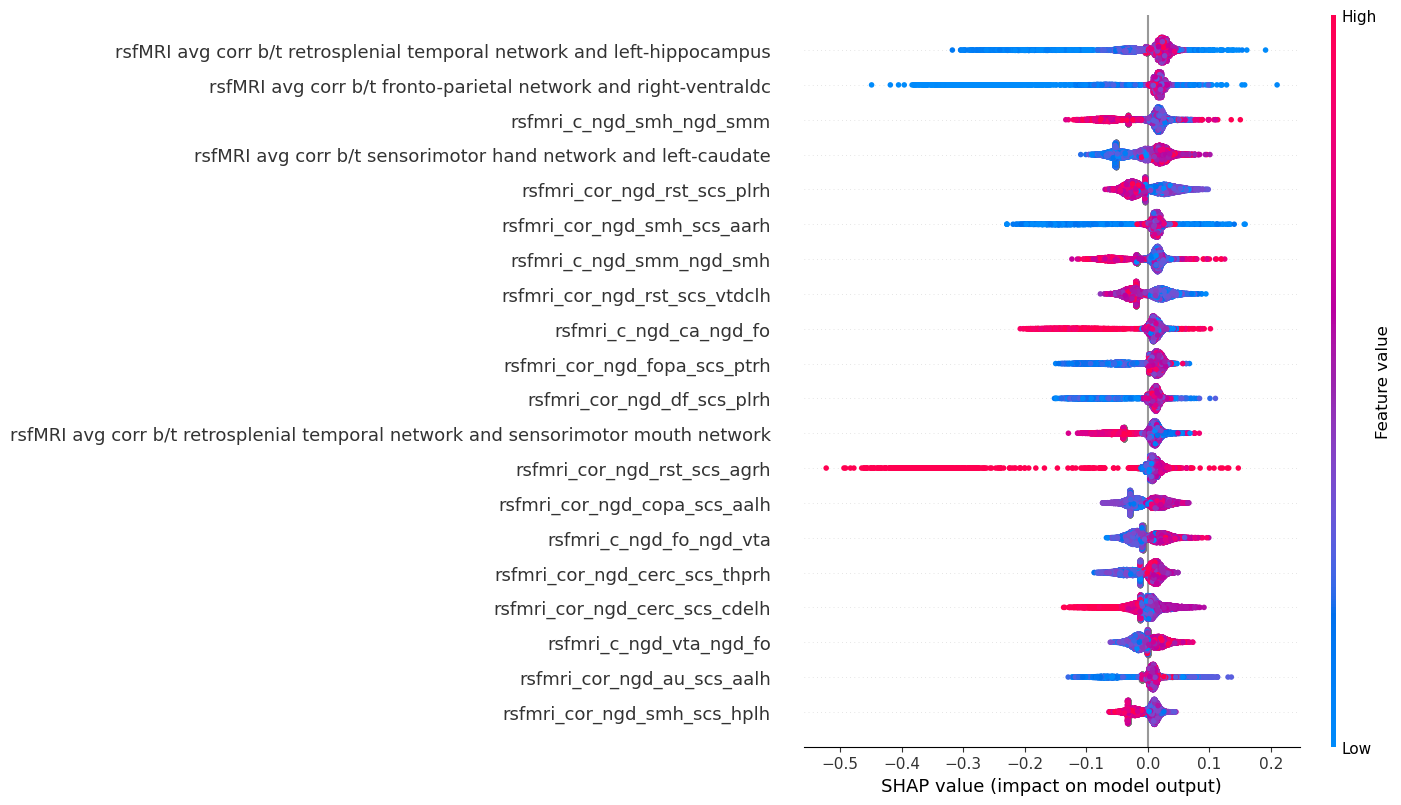

In [16]:
plt.style.use('default')
shap.summary_plot(old_api_shap_values, X_display)

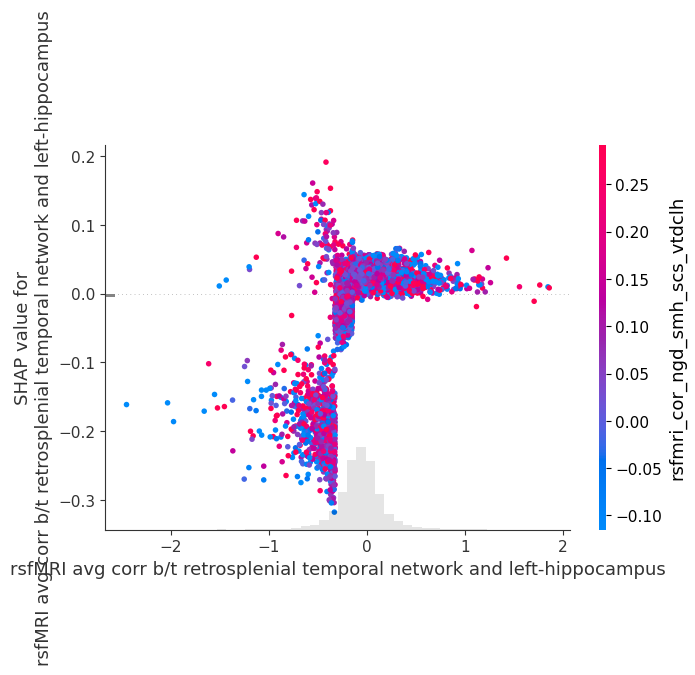

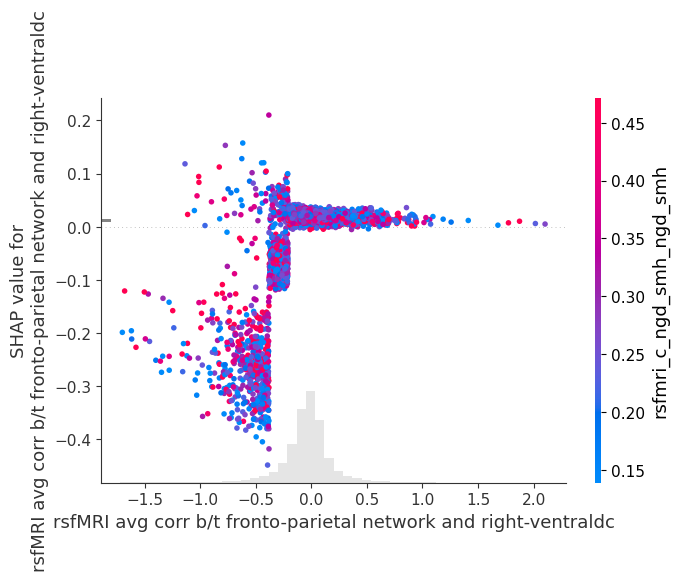

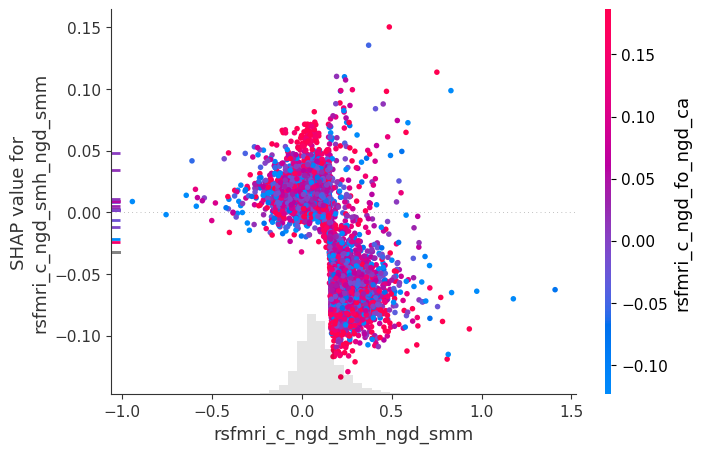

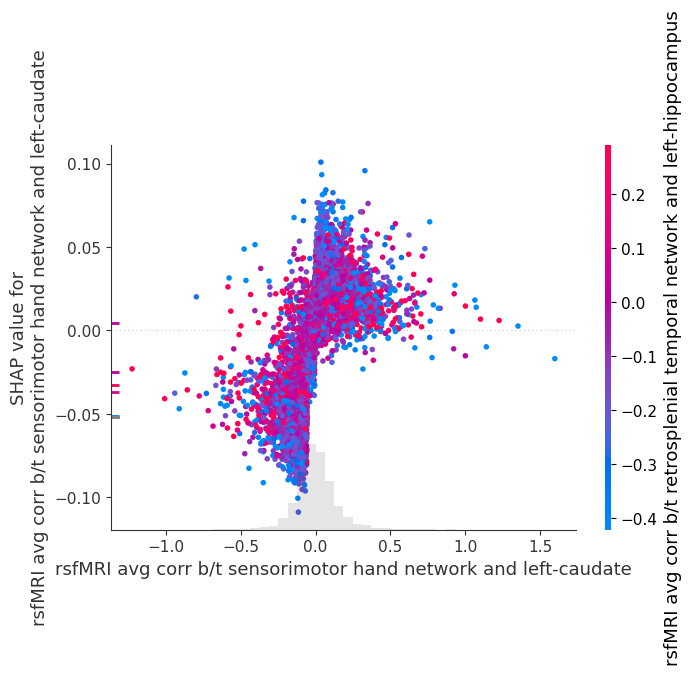

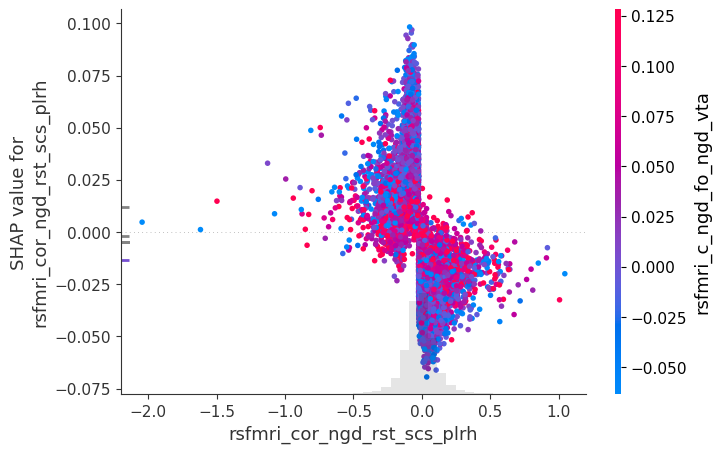

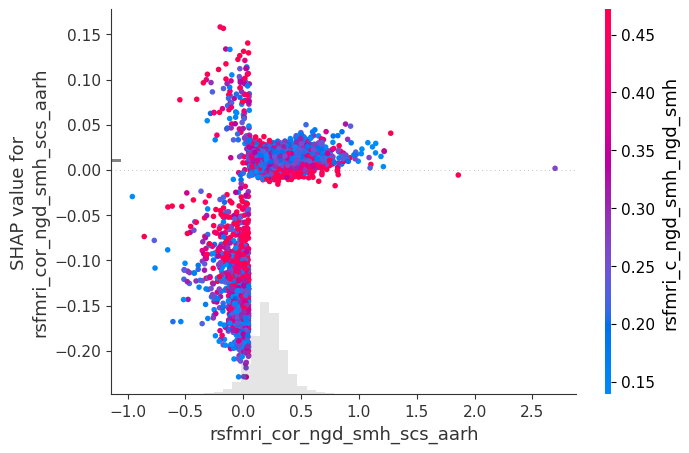

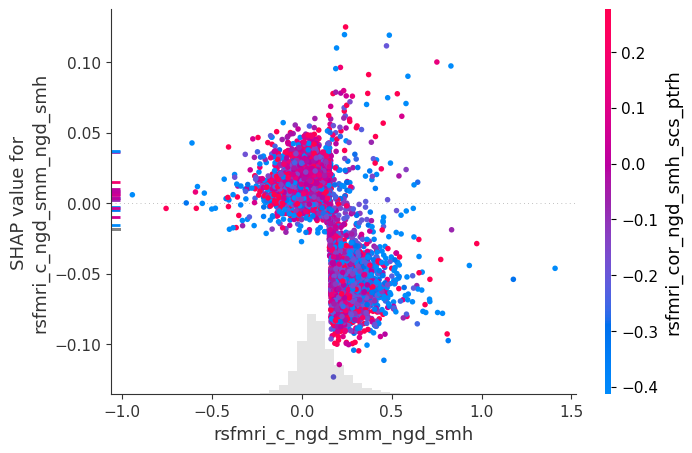

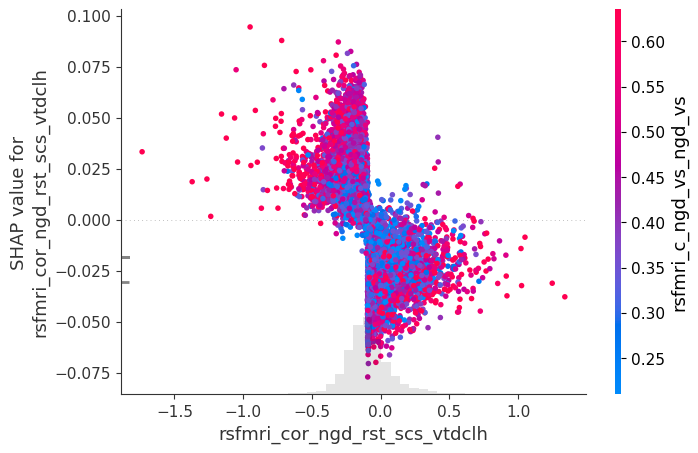

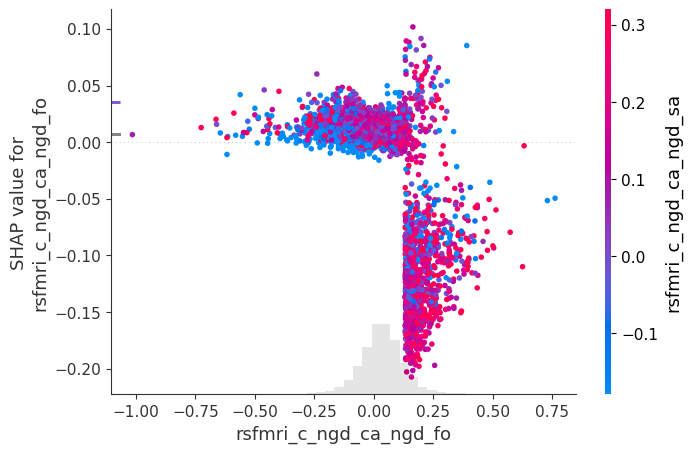

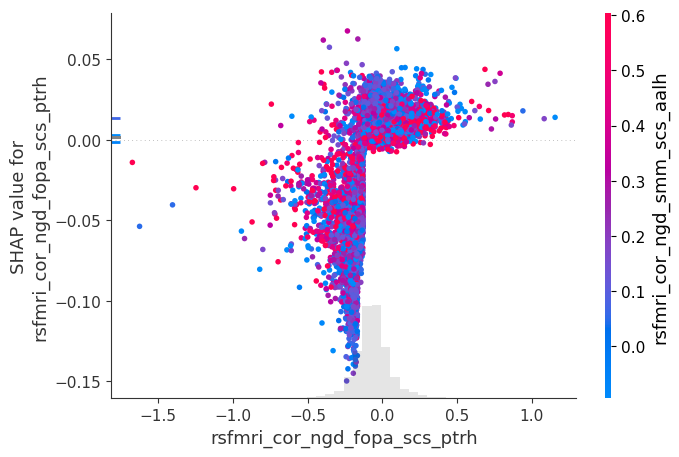

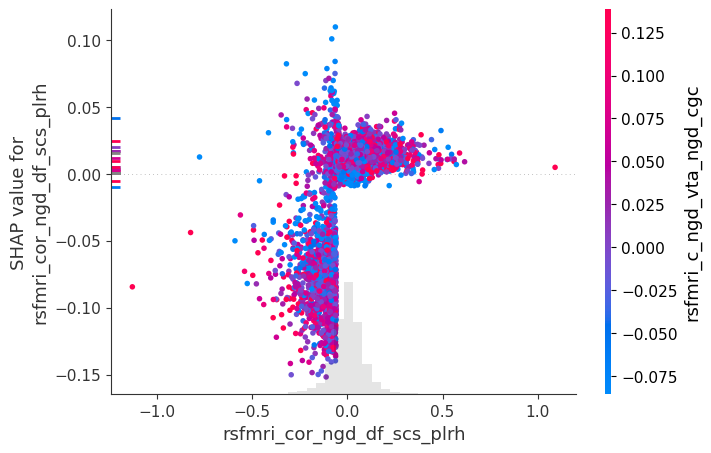

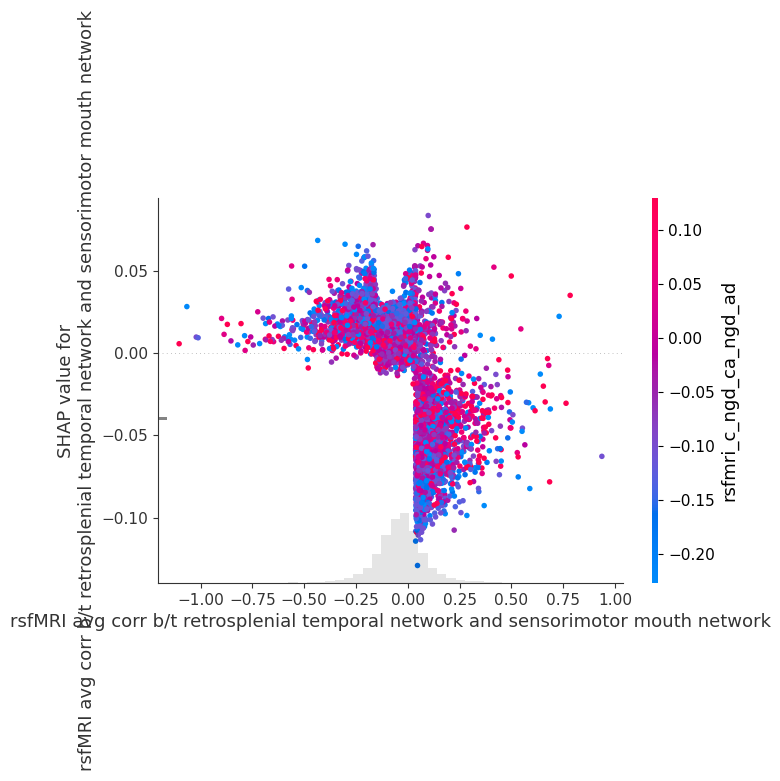

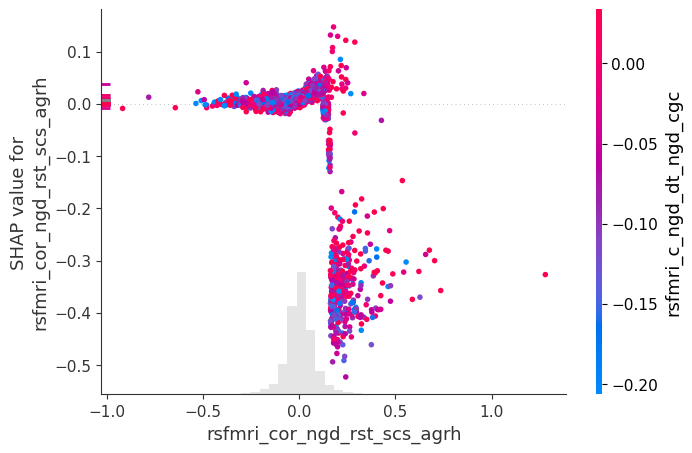

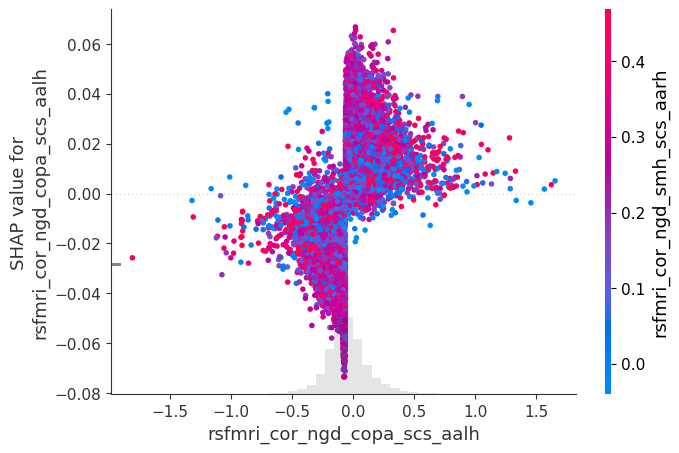

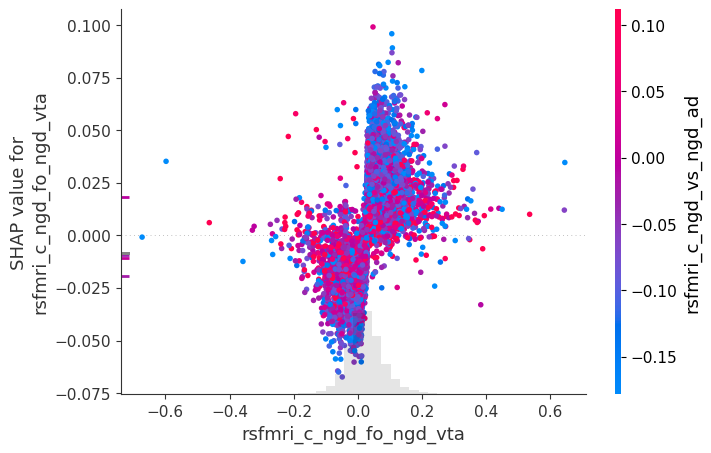

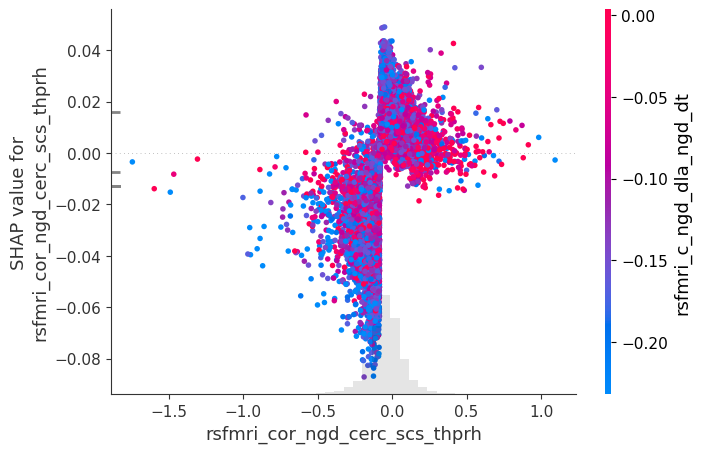

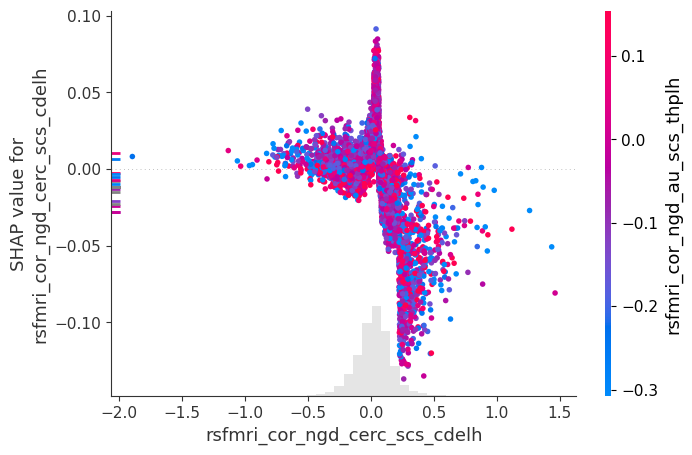

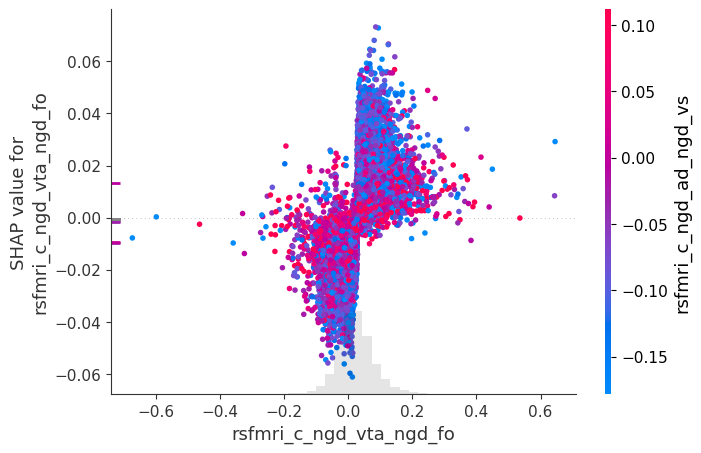

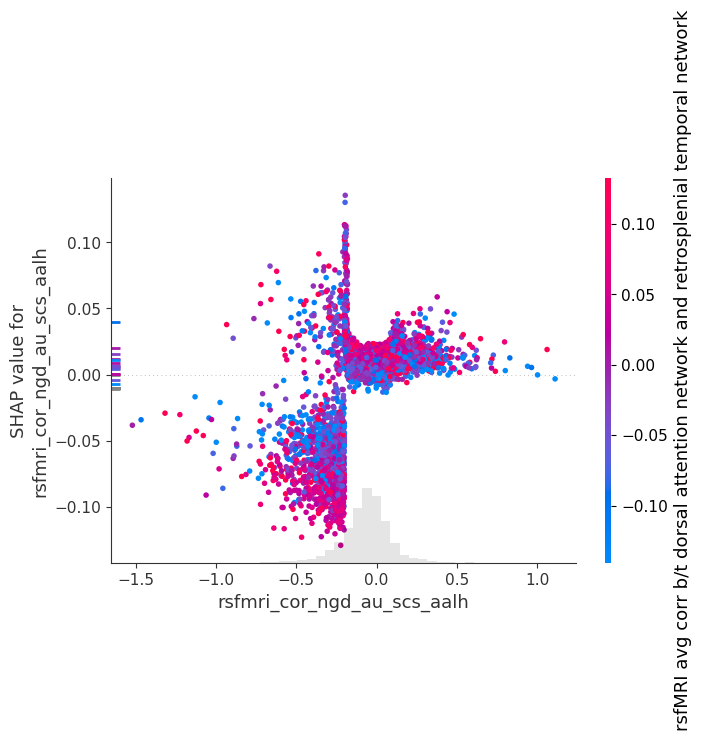

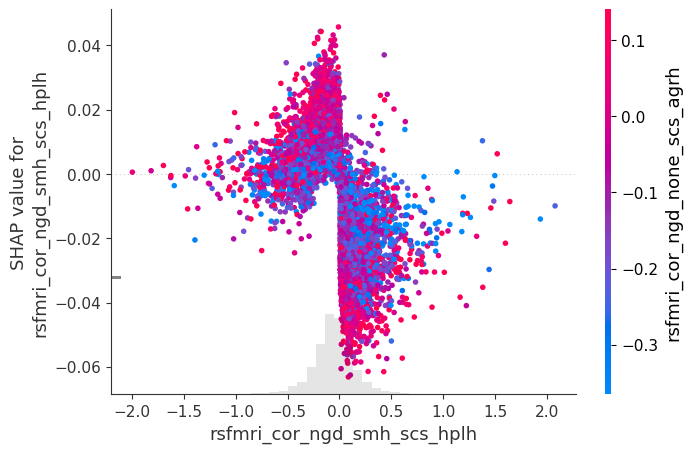

In [17]:
new_api_shap_values = explainer(X)

top_inds = np.argsort(-np.sum(np.abs(new_api_shap_values.values), 0))
for i in range(20):
    shap.plots.scatter(new_api_shap_values[:, top_inds[i]], color=new_api_shap_values)